# INFORMACIÓN:

- __AUTOR:__ Maximiliano Greco
- __FECHA:__ Agosto-2015
- __PYTHON:__ 3.k


In [1]:
# python 3, compatibilidad:
from __future__ import division, unicode_literals, print_function, absolute_import
import os

In [2]:
from numpy import *
import statsmodels.api as sm
import scipy as sp
import pandas as pd
from pandas import DataFrame, Series

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [3]:
import matplotlib.pyplot as plt
import prettyplotlib as ppl
import seaborn as sns

In [4]:
# import bokeh.plotting as bkh
# bkh.output_notebook()

In [59]:
sns.set(style="white", color_codes=True)
#sns.set(style="ticks", palette="Set2")
sns.despine()

In [9]:
%matplotlib inline

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

# Cambiamos el directorio de trabajo a la raíz

In [11]:
# dir_raiz = u'/Users/mmngreco/Documents/repos/okun_with_mpa/'
dir_raiz = u'/Users/mmngreco/anaconda/envs/py3/bin/repo_py3/okun_with_mpa/'

os.chdir(dir_raiz)

# TEORÍA

- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)


# Ley de Okun

La llamada ley de Okun es una observación empírica que señala la correlación existente entre los cambios en la tasa de desempleo y el crecimiento de una economía. Fue propuesta en 1962 por el economista norteamericano Arthur Okun en el artículo "Potential GNP: Its Measurement and Significance".1

Okun señaló que para mantener los niveles de empleo, una economía necesitaba crecer cada año entre el 2,6% y el 3%. Cualquier crecimiento inferior significaba un incremento del desempleo debido a la mejora de la productividad. La ley de Okun señala además, que una vez mantenido el nivel de empleo gracias al crecimiento del 3%, para conseguir disminuir el desempleo es necesario crecer dos puntos porcentuales por cada punto de desempleo que se quiera reducir.2

Esta "ley", es solo una observación empírica, ya que no es posible demostrarla. Okun se basó en datos de los años 1950 en Estados Unidos, y además avisó que esta teoría sólo es efectiva cuando la tasa de desempleo está entre el 3 y 7,5 %. A pesar de eso, la regla se ha cumplido aproximadamente en la mayoría de casos, y por eso es considerada como una observación muy fiable en macroeconomía. El porcentaje exacto depende del período y país considerados, aunque lo normal es que esté alrededor del 2,5 % (entre 2 y 3). El hecho de que el coeficiente no sea predecible hace que algunos consideren a esta regla poco apropiada.

Formulación matemática de la observación de Okun[editar]
La ley de Okun puede ser expresada en la siguiente forma:3

## $$(\overline{Y}-Y)/\overline{Y} = c(u-\overline{u}), $$

donde:
- $\overline{Y}$ es la PIB de pleno empleo o producción potencial
- Y es el PIB actual
- $\overline{u}$ es la tasa natural de desempleo
- $u$ es la tasa actual de desempleo
- $c$ es el factor que relaciona los cambios en el desempleo con los cambios en la producción.

La ley de Okun tal como se ha mostrado antes es difícil de usar en la práctica porque $\overline{Y}$ y $\overline{u}$ pueden ser solo estimados, nunca medidos. Una forma más corriente de expresar la ley, expresada en forma de tasa de crecimiento de la ley de Okun, relaciona los cambios en la producción con los cambios en el desempleo:

## $$\Delta Y/Y = k - c \Delta u$$

donde:
- Y y c tal como se definieron anteriormente
- $\Delta Y$ es el cambio en la producción actual desde un año al siguiente
- $\Delta u$ es el cambio en el desempleo actual desde un año al siguiente
- k es el porcentaje anual de crecimiento de la producción de pleno empleo

# REGRESIÓN:

Método de estimación:
MCO

- statsmodels: [Regression](http://statsmodels.sourceforge.net/devel/regression.html) [Get Started](http://statsmodels.sourceforge.net/devel/gettingstarted.html)
- Linear Regression: [link](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)

# DATOS

Importar Datos
Explorar Variables
- Regiones
- Variables: PIB, Tasa de Paro, Empleo


In [15]:
# importamos los datos:

UTF = 'utf-8'
# encod = 'utf-8-sig'

dempleo = pd.read_excel('data_work/d_empleo.xls', encoding=UTF, index_col=0)
dtparo = pd.read_excel('data_work/d_tasa_u.xls', encoding=UTF, index_col=0)
dpib = pd.read_excel('data_work/d_y.xls', encoding=UTF, index_col=0, sheetname=0)

In [16]:
regiones = dempleo.columns # variable con los nombres de las ccaa

# CREAMOS DataFrame:

Creamos un datafrema con todas las regiones y todas las variables. Esto nos facilita el trabajo, ya que podemos filtrar los años (indice) para los que tenemos datos de todas las variables.

In [17]:
data = pd.concat([dtparo, dpib, dempleo], 
                 axis=1, 
                 keys=['du', 'dy', 'dl'], 
                 names=['Variables', 'Regiones'])

In [18]:
data.head()

Variables      du                                                           \
Regiones   España Andalucía  Aragón Asturias, Principado de Balears, Illes   
tiempo                                                                       
1977       0.9500    1.9250  0.3950                  0.7700        -0.0050   
1978       1.7575    1.4450  2.1000                  1.3400         0.2225   
1979       1.6925    1.3275  1.6925                  2.2325         0.4725   
1980       2.7800    3.5650  2.1400                  1.0675         3.1800   
1981       2.6150    2.3850  3.1725                  3.3450         1.9625   

Variables                                                                   \
Regiones  Canarias Cantabria Castilla y León Castilla - La Mancha Cataluña   
tiempo                                                                       
1977        0.1950    0.4450          1.5200               0.5300   0.5150   
1978        1.2675    0.9575          1.0400               1.5025   2.2925   
1979        0.7400    1.0200          1.4500               1.6425   1.8675   
1980        1.6975    1.9725          1.7250               2.9925   4.2400   
1981        3.9050    2.8425          1.9225               3.2925   3.1625   

Variables                                                                \
Regiones  Comunitat Valenciana Extremadura Galicia Madrid, Comunidad de   
tiempo                                                                    
1977                    0.8450      3.6600  0.3100               1.1700   
1978                    1.1000      1.7825  0.6850               3.0475   
1979                    1.8825      3.2200  0.8625               2.0875   
1980                    3.0675      1.5025  1.6100               2.1575   
1981                    3.6225      1.5200  1.1075               1.8175   

Variables                                                                     \
Regiones  Murcia, Región de Navarra, Comunidad Foral de País Vasco Rioja, La   
tiempo                                                                         
1977                -0.0650                      -0.500     0.7200    0.3350   
1978                 0.9475                       2.160     3.1450    1.1100   
1979                 1.9200                       2.985     2.2650    1.5275   
1980                 1.8650                       3.450     3.0200    1.0575   
1981                 2.7275                       1.160     3.3375    2.2550   

Variables        dy                                              \
Regiones     España Andalucía    Aragón Asturias, Principado de   
tiempo                                                            
1977            NaN       NaN       NaN                     NaN   
1978            NaN       NaN       NaN                     NaN   
1979            NaN       NaN       NaN                     NaN   
1980            NaN       NaN       NaN                     NaN   
1981      -0.176386 -1.456997 -2.346228                1.121621   

Variables                                                     \
Regiones  Balears, Illes  Canarias Cantabria Castilla y León   
tiempo                                                         
1977                 NaN       NaN       NaN             NaN   
1978                 NaN       NaN       NaN             NaN   
1979                 NaN       NaN       NaN             NaN   
1980                 NaN       NaN       NaN             NaN   
1981            3.640682  0.942174   1.35897       -5.480896   

Variables                                                                  \
Regiones  Castilla - La Mancha  Cataluña Comunitat Valenciana Extremadura   
tiempo                                                                      
1977                       NaN       NaN                  NaN         NaN   
1978                       NaN       NaN                  NaN         NaN   
1979                       NaN       NaN                  NaN         NaN

## Número de Regiones y Variables: 

- __Regiones:__
    - CCAA
    - España
    - Excepto Ceuta y Melilla.
- __Variables:__
    - Tasa de Paro
    - Empleo
    - PIB
    

In [19]:
# Numero de regiones:
len(regiones)

print(len(regiones))

18


De las cuales:
- España
- 17 CCAA

In [20]:
# Comprobamos que están todas las filas (años)
# En cada dataframe tenemos la variable tiempo, cuya diferencia tiene que ser 1, así comprobamos que no nos hayamos dejado ningúna fila por el camino.

In [21]:
#DataFrame([dempleo.index, dpib.index, dtparo.index], index=['dempleo', 'dpib', 'dtparo'])

In [22]:
# Para comprobar que todos los años son consecutivos, la diferencia debe ser 1:
#pd.DataFrame([dpib.index, dtparo.index, dempleo.index]).T.diff(periods=1)

In [23]:
# con matplotlib
# fig = plt.figure(figsize=(15,15))
# data.du.boxplot(rot=90, ax=fig.add_subplot(311))
# data.dl.boxplot(rot=90, ax=fig.add_subplot(312))
# data.dy.boxplot(rot=90, ax=fig.add_subplot(313))

# plt.tight_layout()

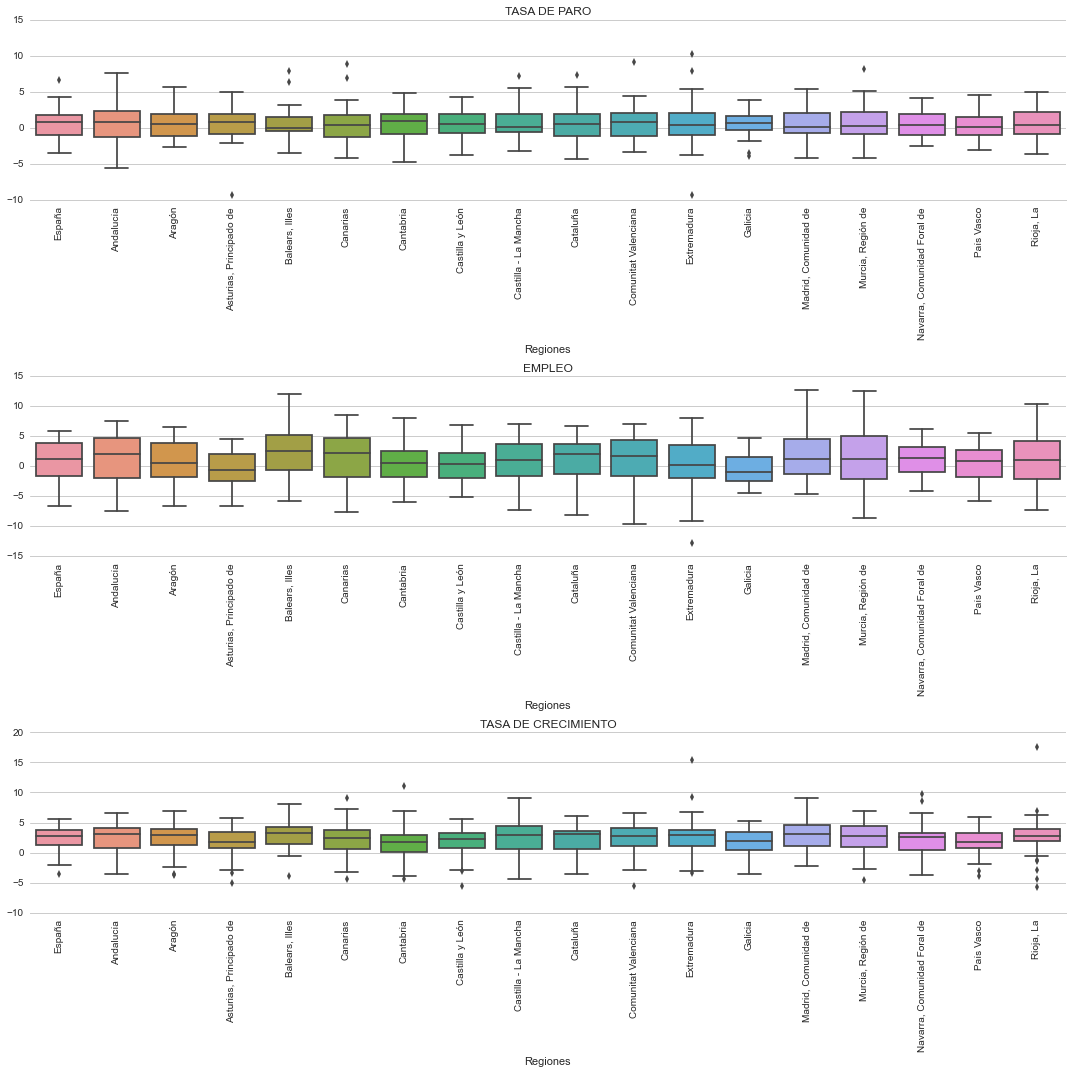

In [20]:
# con seaborn
fig = plt.figure(figsize=(15,15))
sns.set(style='whitegrid')

g1 = sns.boxplot(data=data.du, fliersize=5, width=.8, ax=fig.add_subplot(311))
g1.set_xticklabels(data.du.columns, rotation=90)
g1.set_title('TASA DE PARO')

g2 = sns.boxplot(data=data.dl, fliersize=5, width=.8, ax=fig.add_subplot(312))
g2.set_xticklabels(data.dl.columns, rotation=90)
g2.set_title('EMPLEO')

g3 = sns.boxplot(data=data.dy, fliersize=5, width=.8, ax=fig.add_subplot(313))
g3.set_xticklabels(data.dy.columns, rotation=90)
g3.set_title('TASA DE CRECIMIENTO')

sns.despine(left=True)

plt.tight_layout()

# CORRELACIÓN:

## __Coeficiente de correlación de Pearson __:
_[Wikipedia, la enciclopedia libre](https://es.wikipedia.org/wiki/Correlaci%C3%B3n)_

En estadística, el coeficiente de correlación de Pearson es una medida de la relación lineal entre dos variables aleatorias cuantitativas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.

De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas.


El coeficiente de correlación de Pearson se simboliza con la letra $\rho_{x,y}$, siendo la expresión que nos permite calcularlo:

## $$\rho_{X,Y}={\sigma_{XY} \over \sigma_X \sigma_Y} ={E[(X-\mu_X)(Y-\mu_Y)] \over \sigma_X\sigma_Y}$$

Donde:

- $\sigma_{XY}$ es la covarianza de (X,Y)
- $\sigma_{X}$ es la desviación típica de la variable X
- $\sigma_{Y}$ es la desviación típica de la variable Y

## Para una muestra:

## $$r = r_{xy} =\frac{\sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{y})^2}}$$


## EJEMPLOS DE CORRELACIONES

![corr2_img](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png)

# TASA DE PARO Y PIB:

En teoría, esperamos que la correlación entre la tasa de paro y el PIB sea __negativa__, cuanto más aumente PIB el efecto esperado sobre la tasa de paro es que disminuya.

Veamos que sucede:

In [21]:
dtparo.corrwith(dpib, axis=0).order(ascending=True)

España                        -0.877950
Cataluña                      -0.857442
Comunitat Valenciana          -0.836010
País Vasco                    -0.804784
Madrid, Comunidad de          -0.779756
Murcia, Región de             -0.775262
Andalucía                     -0.762970
Canarias                      -0.756703
Navarra, Comunidad Foral de   -0.709465
Aragón                        -0.689509
Castilla - La Mancha          -0.656317
Galicia                       -0.647730
Balears, Illes                -0.607848
Asturias, Principado de       -0.541595
Cantabria                     -0.501732
Castilla y León               -0.478991
Rioja, La                     -0.262135
Extremadura                   -0.043467
dtype: float64

En general, se cumple la teoría, pero vemos que los efectos no son muy intensos. Destaca sobre todo Extremadura, que tiene un coeficiente de correlación positivo.

# EMPLEO Y PIB

En este caso, el efecto esperado del empleo sobre el pib es que sea positivo. Cuanto más crece la economía más trabajo emplea.

In [22]:
dempleo.corrwith(dpib, axis=0,).order(ascending=True)

Extremadura                    0.172248
Rioja, La                      0.221050
Balears, Illes                 0.230021
Castilla y León                0.544230
Cantabria                      0.547810
Asturias, Principado de        0.569453
Aragón                         0.666150
Galicia                        0.692052
Canarias                       0.723375
Madrid, Comunidad de           0.738184
Navarra, Comunidad Foral de    0.741175
Castilla - La Mancha           0.773320
Murcia, Región de              0.787795
País Vasco                     0.806751
Andalucía                      0.858547
Cataluña                       0.870319
Comunitat Valenciana           0.877776
España                         0.919183
dtype: float64

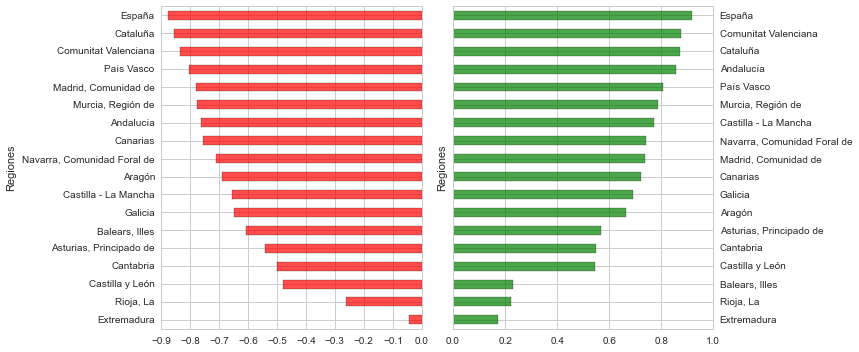

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(121)
data.du.corrwith(data.dy, axis=0).order(ascending=False).plot(kind='barh', color='red', alpha=0.7)
plt.subplot(122)
data.dl.corrwith(data.dy, axis=0).order(ascending=True).plot(kind='barh', color='green', alpha=0.7)
plt.gca().yaxis.tick_right()

plt.tight_layout()

# GRÁFICOS:


## GRÁFICOS DE DISPERCIÓN:

## TASA DE PARO y PIB

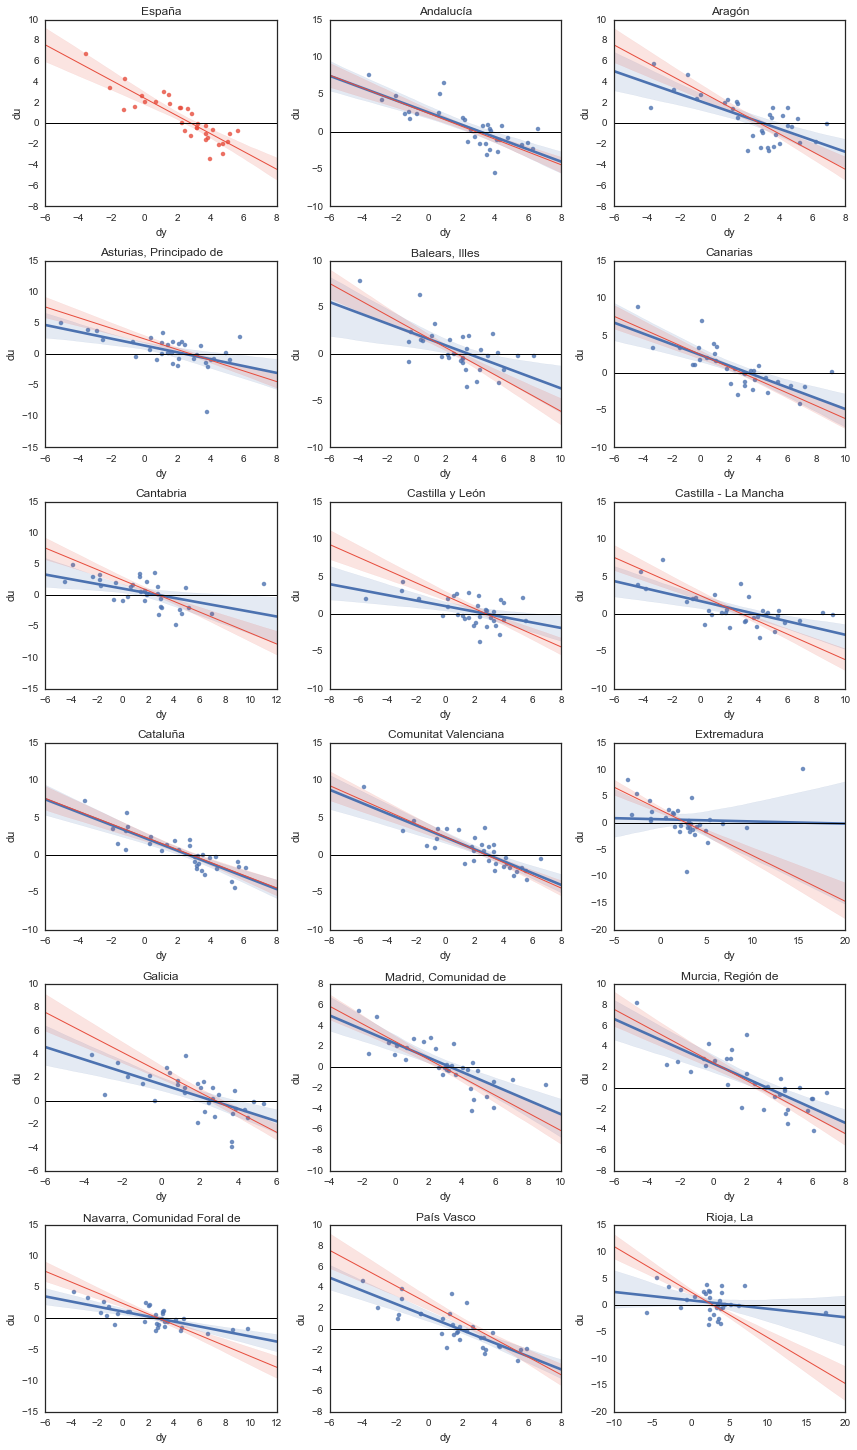

In [73]:
fig = plt.figure(figsize=(12,60))

for i, reg in enumerate(regiones):
    if reg == 'España':
        ax = fig.add_subplot(len(regiones), 3, i + 1)
        g = sns.regplot(y=data.du[reg], x=data.dy[reg], ax=ax, color="#e74c3c", line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)

    else:
        ax = fig.add_subplot(len(regiones), 3, i + 1)
        g = sns.regplot(y=data.du[reg], x=data.dy[reg], ax=ax)
        sns.regplot(y=data.du['España'], x=data.dy['España'], ax=ax, color="#e74c3c", scatter=False, line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)
    g.set_xlabel('dy')
    g.set_ylabel('du')
    g.set_title(reg)

plt.tight_layout()

## EMPLEO y PIB

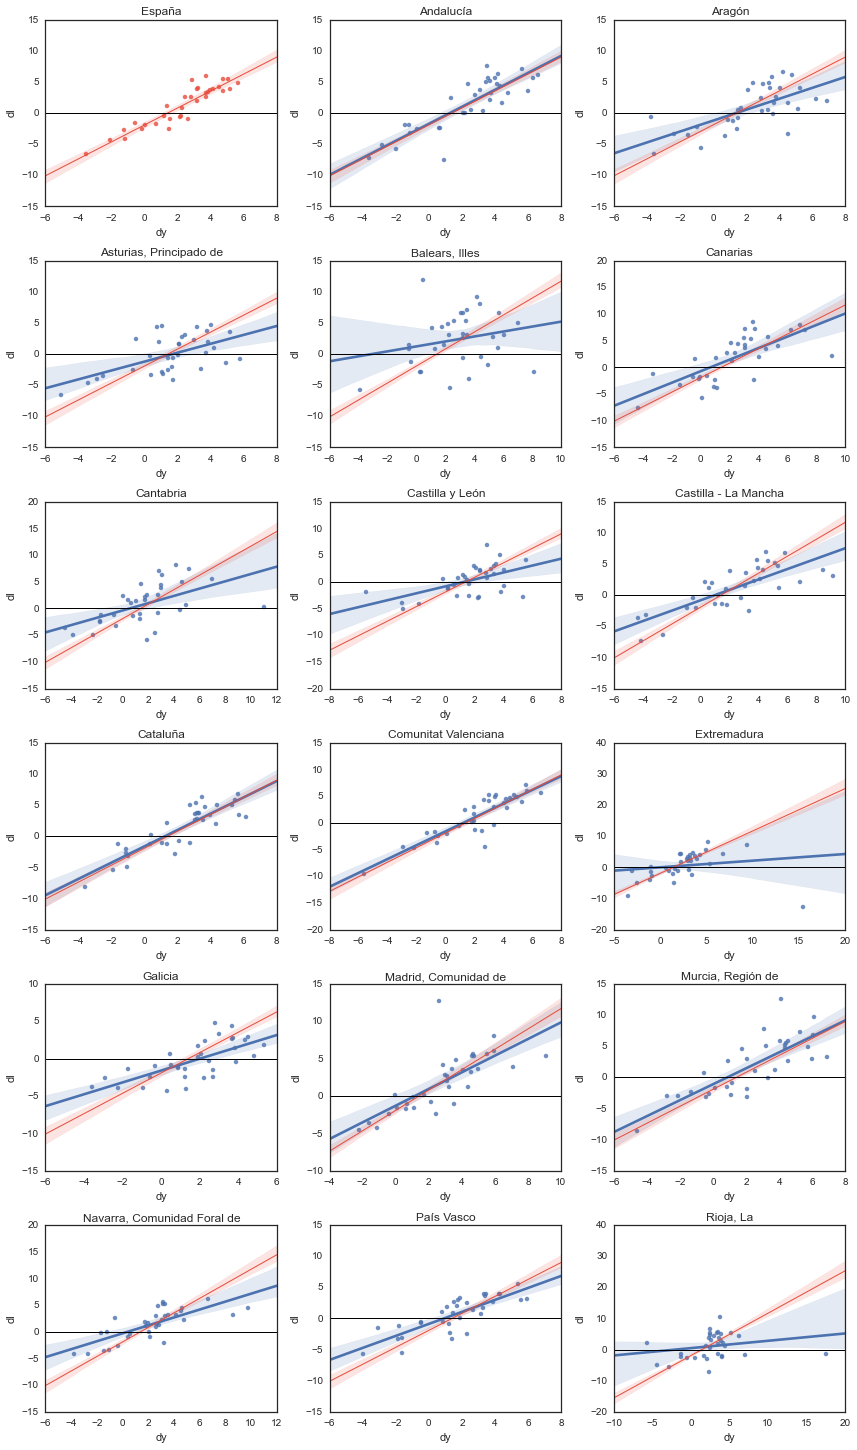

In [74]:
fig = plt.figure(figsize=(12,60))

for i, reg in enumerate(regiones):
    if reg == 'España':
        ax = fig.add_subplot(len(regiones), 3, i + 1)
        g = sns.regplot(y=data.dl[reg], 
                        x=data.dy[reg], 
                        ax=ax, color="#e74c3c", 
                        line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)

    else:
        ax = fig.add_subplot(len(regiones), 3, i + 1)
        g = sns.regplot(y=data.dl[reg], x=data.dy[reg], ax=ax)
        sns.regplot(y=data.dl['España'], 
                    x=data.dy['España'], 
                    ax=ax, color="#e74c3c", 
                    scatter=False, 
                    line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)
    g.set_xlabel('dy')
    g.set_ylabel('dl')
    g.set_title(reg)

plt.tight_layout()


# MODELO MCO: 

## TASA PARO:

### MODELO A ESTIMAR:
### $$ du = \beta_0 + \beta_1dy $$

donde:
- __du__ = primera diferencia entre la tasa de paro
- __dy__ = tasa de crecimiento interanual


In [75]:
# ca = 'Rioja, La'
# pd.stats.ols.OLS(x=data.dy[ca], y=data.du[ca], intercept=True, nw_lags=1)

In [265]:
# TASA DE PARO
# Fit and summarize OLS model
sumrz_paro = dict()
params_paro = dict()
models_paro = dict()

for i, ca in enumerate(regiones):
    x = sm.add_constant(data.dy[ca])
    mod = sm.OLS(endog=data.du[ca], exog=x, missing='drop')
    res = mod.fit()
    # guardar datos:
    models_paro[ca] = res
    sumrz_paro[ca] = res.summary(xname=['const','dy'], yname='du', title=ca)
    params_paro[ca] = [res.params[0], 
                       res.params[1], 
                       -divide(res.params[0], res.params[1]), 
                       res.rsquared, res.bse[0], res.bse[1]] 

In [266]:
# EMPLEO
# Fit and summarize OLS model
sumrz_empleo = dict()
params_empleo = dict()
models_empleo = dict()

for i, ca in enumerate(regiones):
    x = sm.add_constant(data.dy[ca])
    mod = sm.OLS(endog=data.dl[ca], exog=x, missing='drop')
    res = mod.fit()
    # guardamos datos:
    models_empleo[ca] = res
    sumrz_empleo[ca] = res.summary(xname=['const','dy'], yname='dl', title=ca) # model
    params_empleo[ca] = [res.params[0], 
                         res.params[1], 
                         -divide(res.params[0], res.params[1]), 
                         res.rsquared, res.bse[0], res.bse[1]] 

# RESÚMEN DE LOS MODELOS:

# MCO, TASA DE PARO:

In [290]:
nombres_parametros = ['b0', 'b1', 'umbral', 'R2', 'se_b0', 'se_b1']
mco_paro = DataFrame(params_paro, 
                  index=nombres_parametros, 
                  columns=regiones).T.sort('R2', ascending=False)
mco_paro.head()

,b0,b1,umbral,R2,se_b0,se_b1
España,2.421172,-0.856401,2.827146,0.770796,0.268894,0.083876
Cataluña,2.281082,-0.858243,2.657850,0.735206,0.310057,0.092508
Comunitat Valenciana,2.353390,-0.795625,2.957912,0.698913,0.328904,0.093791
País Vasco,1.136721,-0.631242,1.800770,0.647677,0.244070,0.083619
"Madrid, Comunidad de",2.238595,-0.680393,3.290150,0.608019,0.380172,0.098119


# MCO, EMPLEO:

In [291]:
mco_empleo = DataFrame(params_empleo, 
                       index=nombres_parametros, 
                       columns=regiones).T.sort('R2', ascending=False)
mco_empleo.head()

,b0,b1,umbral,R2,se_b0,se_b1
España,-1.922572,1.362449,1.411115,0.844897,0.326800,0.103194
Comunitat Valenciana,-1.605421,1.294940,1.239764,0.770491,0.433752,0.124937
Cataluña,-1.618634,1.310967,1.234687,0.757456,0.434109,0.131140
Andalucía,-1.753904,1.365127,1.284792,0.737102,0.508784,0.144121
País Vasco,-0.887417,0.962826,0.921679,0.650848,0.359474,0.124664


# EXPORTAMOS LOS MODELOS:

## PARO:

In [292]:
# MCO: PARO:
with open(u'data_work/MCO/modelos_u.html', "w") as fweb:
    for k, v in sumrz_paro.items():
        print('<h1>{}</h1>'.format(k), file=fweb)
        print(sumrz_paro[k].as_html(), file=fweb)
        print(u'</br></br></br>', file=fweb)
    
    fweb.close()

# MCO: PARO:

n = 0
with open('data_work/MCO/modelos_u.txt', "w") as f:
    for k, v in sumrz.items():
        n += 1
        print(str(n), file=f)
        print(k, file=f)
        print(v.as_text(), file=f)
        print('\n\n\n', file=f)

    f.close()


## EMPLEO

In [293]:
# MCO: EMPLEO:

with open(u'data_work/MCO/modelos_l.html', "w") as fweb:
    for k, v in sumrz_empleo.items():
        print('<h1>{}</h1>'.format(k), file=fweb)
        print(sumrz_empleo[k].as_html(), file=fweb)
        print(u'</br></br></br>', file=fweb)
    
    fweb.close()

# MCO: EMPLEO:
n = 0
with open('data_work/MCO/modelos_l.txt', "w") as f:
    for k, v in sumrz_empleo.items():
        n += 1
        print(str(n), file=f)
        print(k, file=f)
        print(v.as_text(), file=f)
        print('\n\n\n', file=f)

    f.close()

In [294]:
!open 'data_work/MCO'

In [295]:
# exportamos datos para comprobar con Gretl
# for ca in ccaa:
#     DataFrame([data.du[ca], data.dl[ca], data.dy[ca]], index=['du', 'dl', 'dy']).T.to_csv('data_work/gretl/%s.csv' % # ca, encoding='utf-8')

# UMBRAL DE CRECIMIENTO:

- PARO
- EMPLEO

El umbral de crecimiento de una economía, es la interpretación más util que nos dá el modelo de Okun. Nos dice cuanto tiene que crecer la economía para comenzar a crear empleo o reducir la tasa de paro.

__Se obtiene a partir del modelo de Okun:__
### $$ du = \beta_0 + \beta_1dy $$

donde:
- __du__ = primera diferencia entre la tasa de paro
- __dy__ = tasa de crecimiento interanual

Tal y como está enunciado, el umbral de crecimiento lo obtenemos cuando $du = 0$, por tanto:

$$ du = \beta_0 + \beta_1dy $$
$$ 0 = \beta_0 + \beta_1dy $$
$$ -\beta_0 = \beta_1dy $$
$$ -\frac{\beta_0}{\beta_1} = dy $$

Así, $ -\frac{\beta_0}{\beta_1} = dy$ nos dice el valor de $dy$ a partir del cual dismuye (aumenta) la tasa de paro (empleo).



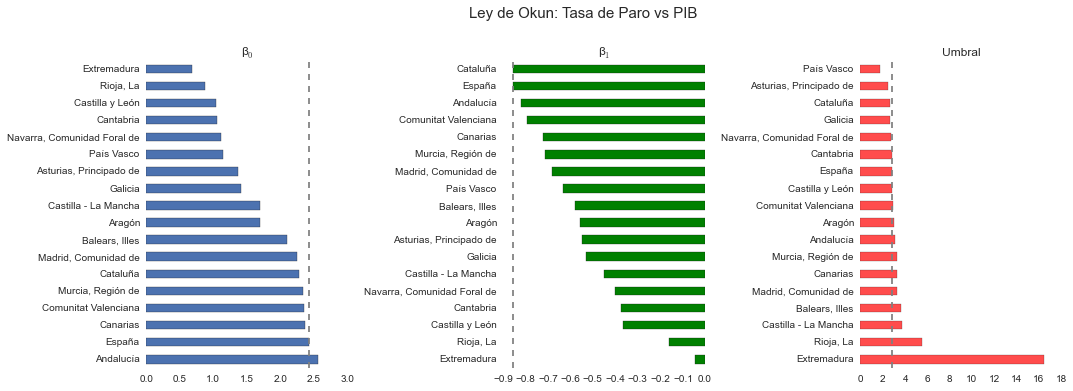

In [297]:
fig = plt.figure(figsize=(15,5))
linestyle = '--'

ax1 = plt.subplot(131)
mco_paro.b0.order(ascending=False).plot(kind='barh', title='β$_0$')
plt.axvline(mco_paro.b0.T['España'], linestyle=linestyle, color='grey')

ax2 = plt.subplot(132)
mco_paro.b1.order(ascending=False).plot(kind='barh', title='β$_1$', color='green')
plt.axvline(mco_paro.b1.T['España'], linestyle=linestyle, color='grey')

ax3 = plt.subplot(133)
mco_paro.umbral.order(ascending=False).plot(kind='barh', color='red', alpha=0.7, title='Umbral')
plt.axvline(mco_paro.umbral.T['España'], linestyle=linestyle, color='grey')

plt.text(x=-35, y=20,s=u'Ley de Okun: Tasa de Paro vs PIB', fontsize=15)

for ax in [ax1, ax2, ax3]:
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.axes.get_xaxis().set_visible(True)
    ax.axes.get_yaxis().set_visible(True)

    ax.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom='off',      # ticks along the bottom edge are off
                    top='off',         # ticks along the top edge are off
                    left='off',
                    labelbottom='on',
                    labelleft='on')

#ax3.invert_xaxis()
#ax3.yaxis.tick_right()


plt.tight_layout()

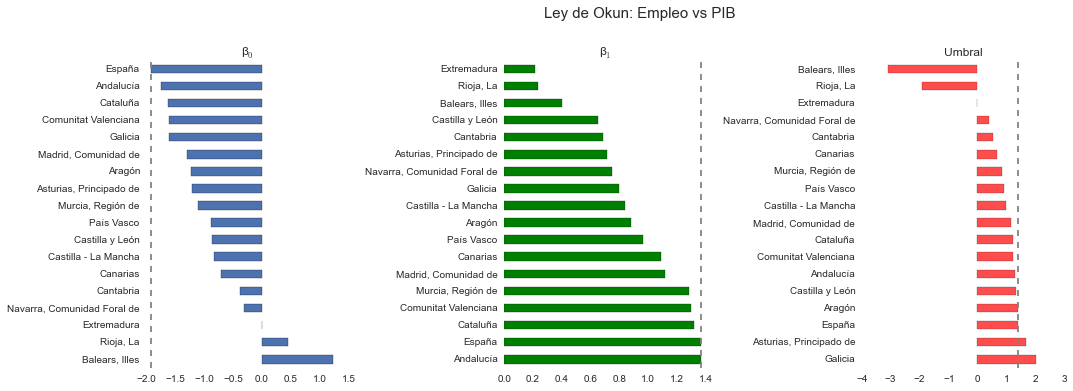

In [298]:
fig = plt.figure(figsize=(15,5))
linestyle = '--'

ax1 = plt.subplot(131)
mco_empleo.b0.order(ascending=False).plot(kind='barh', title='β$_0$')
plt.axvline(mco_empleo.b0.T['España'], linestyle=linestyle, color='grey')

ax2 = plt.subplot(132)
mco_empleo.b1.order(ascending=False).plot(kind='barh', title='β$_1$', color='green')
plt.axvline(mco_empleo.b1.T['España'], linestyle=linestyle, color='grey')

ax3 = plt.subplot(133)
mco_empleo.umbral.order(ascending=False).plot(kind='barh', color='red', alpha=0.7, title='Umbral')
plt.axvline(mco_empleo.umbral.T['España'], linestyle=linestyle, color='grey')

plt.text(x=-15, y=20,s=u'Ley de Okun: Empleo vs PIB', fontsize=15)

for ax in [ax1, ax2, ax3]:
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.axes.get_xaxis().set_visible(True)
    ax.axes.get_yaxis().set_visible(True)

    ax.tick_params(axis='both',          # changes apply to the x-axis
                   which='both',      # both major and minor ticks are affected
                   bottom='off',      # ticks along the bottom edge are off
                   top='off',         # ticks along the top edge are off
                   left='off',
                   labelbottom='on',
                   labelleft='on')

#ax3.invert_xaxis()
#ax3.yaxis.tick_right()


plt.tight_layout()

In [299]:
data.xs(['España'], level=['Regiones'], axis=1).head()

Variables,du,dy,dl
tiempo,,,
1977,0.9500,NaN,-1.037235
1978,1.7575,NaN,-1.558199
1979,1.6925,NaN,-1.376570
1980,2.7800,NaN,-2.720813
1981,2.6150,-0.176386,-2.575689


# ESTUDIO DE OUTLIERS

## MCO: PARO:

In [318]:
# MCO: TASA PARO VS PIB

outliers_index_paro = dict()

for ca in regiones:
    outlier = models_paro[ca].outlier_test()['bonf(p)']
    if (outlier < 0.05).any() > 0:
        print('\t', ca)
        print(outlier[outlier < 0.05])
        print('\n\n')
        outliers_index_paro[ca] = outlier[outlier < 0.05].index[0]

	 Asturias, Principado de
tiempo
2001    0.000062
Name: bonf(p), dtype: float64



	 Extremadura
tiempo
1984    0.000338
Name: bonf(p), dtype: float64





In [320]:
outliers_index_paro

{'Asturias, Principado de': 2001, 'Extremadura': 1984}

## MCO: EMPLEO:

In [323]:
# MCO: TASA PARO VS PIB
outliers_index_empleo = dict()
for ca in regiones:
    outlier = models_empleo[ca].outlier_test()['bonf(p)']
    if (outlier < 0.05).any() > 0:
        print('\t', ca)
        print(outlier[outlier < 0.05])
        print('\n\n')
        outliers_index_empleo[ca] = outlier[outlier < 0.05].index[0]

	 Andalucía
tiempo
1984    0.015535
Name: bonf(p), dtype: float64



	 Comunitat Valenciana
tiempo
1981    0.006838
Name: bonf(p), dtype: float64



	 Extremadura
tiempo
1984    1.152240e-08
Name: bonf(p), dtype: float64



	 Madrid, Comunidad de
tiempo
2002    0.00001
Name: bonf(p), dtype: float64



	 Murcia, Región de
tiempo
2002    0.043218
Name: bonf(p), dtype: float64





In [324]:
outliers_index_empleo

{'Andalucía': 1984,
 'Comunitat Valenciana': 1981,
 'Extremadura': 1984,
 'Madrid, Comunidad de': 2002,
 'Murcia, Región de': 2002}

# BIBLIOGRAFÍA:

- [Estadisticas Robustas](link1)
- [Correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)
- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)
- [Criterio de Outliers](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico)


[link1]:https://en.wikipedia.org/wiki/Robust_statistics#Definition

# Apéndice:

# Test de Jarque-Bera

En estadística, el test de Jarque-Bera es una prueba de bondad de ajuste acerca de si una muestra de datos tiene la asimetría y la curtosis de una distribución normal. El test recibe el nombre de Carlos Jarque y Anil K. Bera.

El test estadístico JB se define como:


$$JB = \frac{n-k+1}{6} \left( S^2 + \frac14 (C-3)^2 \right)$$
  
donde n es el número de observaciones (o grados de libertad en general); S es la asimetría de la muestra, C la curtosis de la muestra y k el número de regresores:


$S = \frac{ \hat{\mu}_3 }{ \hat{\sigma}^3 }$
$= \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^3} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{3/2}}$

$ C = \frac{ \hat{\mu}_4 }{ \hat{\sigma}^4 }$
$    = \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^4} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{2}} $

donde $\hat{\mu}_3$ y $\hat{\mu}_4$ son las estimaciones de los momentos centrales tercer y cuarto, respectivamente, $\bar{x}$ es la media de la muestra y $\hat{\sigma}^2$ es la estimación del segundo momento central, la varianza.

El estadístico de Jarque-Bera se distribuye asintóticamente como una distribución __chi cuadrado con dos grados de libertad__ y puede usarse para probar la __hipótesis nula__ de que los datos pertenecen a una distribución normal. La hipótesis nula es una __hipótesis conjunta__ de que la asimetría y la curtosis son nulas.



# Test de Breusch-Pagan

En estadística, el test de Breusch-Pagan se utiliza para determinar la heterocedasticidad en un modelo de regresión lineal. Analiza si la varianza estimada de los residuos de una regresión dependen de los valores de las variables independientes.

Supongamos que estimamos el siguiente modelo:


$y = \beta_0 + \beta_1 x + u$

y obtenemos un conjunto de valores para $\hat{u}$, los residuos. Con las restricciones de los Mínimos Cuadrados Ordinarios la media es 0, de modo que dada la suposición de que la varianza no depende de las variables independientes, la estimación de la varianza se puede obtener a partir de la media de los valores al cuadrado. Si la suposición no fuera correcta, podría ocurrir que la varianza estuviera relacionada linealmente con las variables independientes. Ese modelo se puede examinar haciendo una regresión de los residuos al cuadrado respecto de las variables independientes, empleando una ecuación de la forma:


$\hat{u}^2 = \gamma_0 + \gamma_1 x + v$

Esta es la base del test. Si el test-F confirma que las variables independientes son significativas, entonces se puede rechazar la __hipótesis nula__ de homocedasticidad.

# Estadístico de Durbin-Watson

En estadística, el estadístico de Durbin-Watson, desarrollado por el reputado economista Watson, es una estadística de prueba que se utiliza para detectar la presencia de autocorrelación (una relación entre los valores separados el uno del otro por un intervalo de tiempo dado) en los residuos (errores de predicción) de un análisis de la regresión. Lleva el nombre de James Durbin y Geoffrey Watson. La pequeña muestra de la distribución de esta relación se deriva de John von Neumann (von Neumann, 1941). Durbin y Watson (1950, 1951) aplicaron esta estadística para los residuales de mínimos cuadrados, y desarrollaron pruebas para la hipótesis nula de que los errores están correlacionados en serie frente a la alternativa de que siguen un proceso de primer orden autorregresivo. Más tarde, John Denis Sargan y Alok Bhargava desarrollaron varias pruebas estadísticas del tipo Neumann-Durbin-Watson von para la hipótesis nula de que los errores en un modelo de regresión siguen un proceso con una raíz unitaria contra la hipótesis alternativa de que los errores siguen un proceso estacionario de primer orden autorregresivo (Sargan y Bhargava, 1983).

## Cálculo e interpretación del estadístico de Durbin-Watson

Si et es el residual asociado a la observación en el tiempo t, entonces la prueba estadística es:

$d = {\sum_{t=2}^T (e_t - e_{t-1})^2 \over {\sum_{t=1}^T e_t^2}}$

Donde T es el número de observaciones. Puesto que d es aproximadamente igual a 2(1 − r), donde r es la autocorrelación de la muestra de los residuos,1 d = 2 indica que no hay autocorrelación. El valor de d siempre está entre -1 y 1,5. Si la estadística de Durbin-Watson es sustancialmente menor que 0,5, hay evidencia de correlación serial positiva. Como regla general, si Durbin-Watson es inferior a 1,0 aunque lo óptimos es que sea menor que 0, puede ser causa de alarma. Los valores pequeños de d indican los términos de error sucesivos son, en promedio, cerca del valor de los otros, o correlacionados positivamente. Si d> 2, los términos de error sucesivas son, en promedio, muy diferente en valor el uno del otro, es decir, correlacionada negativamente. En las regresiones, esto puede implicar una subestimación del nivel de significación estadística.

Para probar la __autocorrelación positiva__ en importancia α, la estadística de prueba d se compara con los valores críticos inferiores y superiores (dL,α and dU,α):

- Si d < dL,α, existe evidencia estadística de que los términos de error se autocorrelacionados positivamente.
- Si d > dU,α, no hay evidencia estadística de que los términos de error se autocorrelacionados positivamente.
- Si dL,α < d < dU,α, la prueba no es concluyente.

Correlación serial positiva es la correlación en serie en la que un error positivo para una observación aumenta las posibilidades de un error positivo para otra observación.

Para probar la autocorrelación negativa en significación α, la estadística de prueba (4 - d) se compara a bajar y los valores críticos de nivel superior (dL,α and dU,α):

- Si (4 − d) < dL,α, existe evidencia estadística de que los términos de error se autocorrelacionados negativamente.
- Si (4 − d) > dU,α, no hay evidencia estadística de que los términos de error se autocorrelacionados negativamente.
- Si dL,α < (4 − d) < dU,α, la prueba no es concluyente.

Correlación serial negativa implica que un error positivo para una observación aumenta la probabilidad de un error negativo para otra observación y un error negativo para uno aumenta las posibilidades de un error positivo para otra observación.

Los valores críticos, dL,α y dU,α, variar según el nivel de significación (α), el número de observaciones, y el número de predictores en la ecuación de regresión. Su derivación es compleja-los estadísticos suelen obtener a partir de los apéndices de textos estadísticos.

In [36]:
!open data_work/MCO